In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/water_potability.csv")
data.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1220,5.068796,211.689502,22781.364534,5.330123,317.103903,483.442018,14.495791,77.212274,4.362086,1
2113,6.519848,183.225998,14284.647917,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286,0
1849,8.613699,235.944436,20862.455871,7.622565,378.758715,418.697530,13.608075,NaN,3.949220,0
494,NaN,162.626287,21318.961685,7.575279,289.208408,457.811556,7.477315,60.238478,4.514982,0
2423,7.074251,208.920369,16739.266635,7.861469,NaN,518.977153,8.881999,78.419019,4.878944,1


In [ ]:
data.shape

(3276, 10)

In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
data.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
data.fillna(data.mean(), inplace = True)
data.isnull().mean()*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [ ]:
y = data['Potability']
X = data.drop(['Potability'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [ ]:
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.6337741607324516


**Creating loop for the best value of K**

In [ ]:
K = 20
Acc = np.zeros((K))
for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train_scaled, y_train.ravel())
    y_pred = clf.predict(X_test_scaled)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.60223805, 0.63173957, 0.61342828, 0.64292981, 0.63377416,
       0.65412004, 0.64598169, 0.65005086, 0.6439471 , 0.64801628,
       0.64191251, 0.64903357, 0.64496439, 0.63275687, 0.63784334,
       0.65818922, 0.6602238 , 0.65513733, 0.65412004, 0.64598169])

In [ ]:
print(np.max(Acc))
print(np.min(Acc))

0.6602238046795524
0.602238046795524


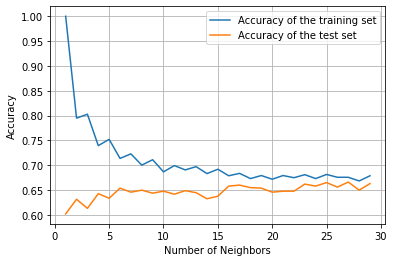

In [ ]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_setting = range(1, 30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train_scaled, y_train.ravel())
    training_acc.append(knn.score(X_train_scaled, y_train))
    test_acc.append(knn.score(X_test_scaled, y_test))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()  